#### DSC630
###### Xin Tang
###### Week2 assignment: visualization

------------------

###### Data description
This datasets contains the info of the countries and population of the country each year from 1960 to 2022.


###### Question to answer:
It is a common sense that China and India are countries with a lot of population. I would like to know:
1. who are the top 5 countries in term of popoluation in year 2022
2. In last 10 years, who are top 5 countries have most population increase.
3. The trend of poplulation change in last 10 year in China.

In [3]:
import numpy as np
import pandas as pd

# Loading the data
df = pd.read_csv("world-population.csv")

In [4]:
# Check data load correctly
print(df.head(2))

                  Country Name         1960         1961         1962  \
0                        Aruba      54608.0      55811.0      56682.0   
1  Africa Eastern and Southern  130692579.0  134169237.0  137835590.0   

          1963         1964         1965         1966         1967  \
0      57475.0      58178.0      58782.0      59291.0      59522.0   
1  141630546.0  145605995.0  149742351.0  153955516.0  158313235.0   

          1968  ...         2013         2014         2015         2016  \
0      59471.0  ...     102880.0     103594.0     104257.0     104874.0   
1  162875171.0  ...  567892149.0  583651101.0  600008424.0  616377605.0   

          2017         2018         2019         2020         2021  \
0     105439.0     105962.0     106442.0     106585.0     106537.0   
1  632746570.0  649757148.0  667242986.0  685112979.0  702977106.0   

          2022  
0     106445.0  
1  720859132.0  

[2 rows x 64 columns]


In [46]:
## Check unique values
cols = df.columns
def Unique_Values():
    for i in np.arange(0,len(cols)):
        print('There are {} of unique values in {} column out of {}'.format(df[cols[i]].nunique(), cols[i], len(df)))
print(Unique_Values())

print('variables with NA values', df.isna().sum())

There are 266 of unique values in Country Name column out of 266
There are 261 of unique values in 1960 column out of 266
There are 261 of unique values in 1961 column out of 266
There are 261 of unique values in 1962 column out of 266
There are 262 of unique values in 1963 column out of 266
There are 262 of unique values in 1964 column out of 266
There are 262 of unique values in 1965 column out of 266
There are 262 of unique values in 1966 column out of 266
There are 262 of unique values in 1967 column out of 266
There are 262 of unique values in 1968 column out of 266
There are 262 of unique values in 1969 column out of 266
There are 262 of unique values in 1970 column out of 266
There are 262 of unique values in 1971 column out of 266
There are 262 of unique values in 1972 column out of 266
There are 262 of unique values in 1973 column out of 266
There are 262 of unique values in 1974 column out of 266
There are 262 of unique values in 1975 column out of 266
There are 262 of unique

###### Data is clean and can proceed with visualization

In [5]:
#remove invalid countries from country names
remove_strings = [
    'countries', 'income', 'dividend', 'OECD', 'IBRD', 'IDA', 
    'Euro', 'Asia', 'Africa', 'classification', 'classified', 'World', 'America','Fragile and conflict affected situations'
]

exceptions = ['American Samoa', 'Central African Republic']

df_countries = df[~df['Country Name'].str.contains('|'.join(remove_strings), case=False) | df['Country Name'].isin(exceptions)]



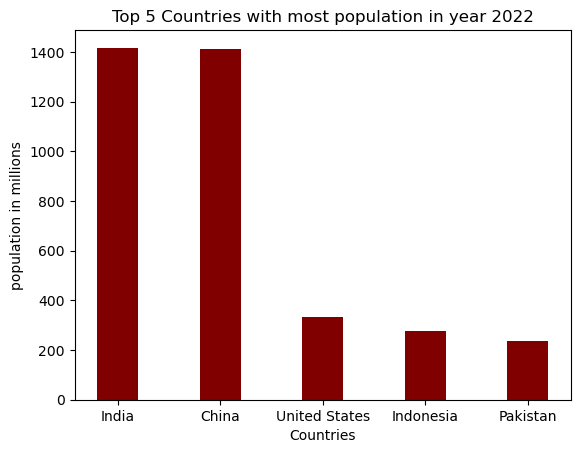

In [9]:
# Who are top 5 countries in term of population 
# Filter out the top 5 in yr2022
df_2022 = df_countries[['Country Name','2022']]
df_top = df_2022.sort_values(by=['2022'], ascending=False)
df_top5 =df_top.head(5)


#use bar plot to show, convert the population count to per millions
import matplotlib.pyplot as plt 
plt.bar(df_top5['Country Name'], df_top5['2022']/1000000, color ='maroon', 
        width = 0.4)
 
plt.xlabel("Countries")
plt.ylabel("population in millions")
plt.title("Top 5 Countries with most population in year 2022")
plt.show()


###### The 5 countries with most people in year 2022 are India, China, USA, Indonesia and Pakistan

In [16]:
# In last 10 years, who are top 5 countries have most population increase.
#Suspend the warning
import warnings
warnings.filterwarnings('ignore')

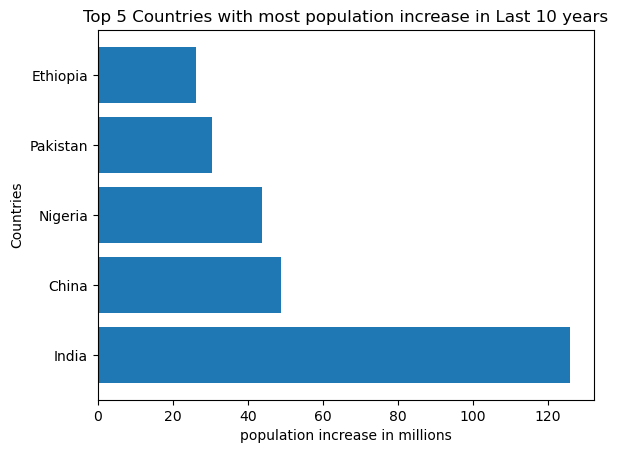

In [25]:
# Calculate the difference and pick up top 5
df_countries['difference']= df_countries['2022']- df_countries['2013']
df_change = df_countries[['Country Name','difference']]
changes = df_change.sort_values(by=['difference'], ascending=False)
change_top5 =changes.head(5)

# draw horizontal bar chart, convert population count to per million for better view
plt.barh(change_top5['Country Name'], change_top5['difference']/1000000)
 
plt.xlabel("population increase in millions")
plt.ylabel("Countries")
plt.title("Top 5 Countries with most population increase in Last 10 years")
plt.show()


###### Besides China, India and pakistan, 2 Africa countries, Ethopia and Nigeria are among top 5 countries with most poplulation increase.

[40    1363.24
Name: 2013, dtype: float64, 40    1371.86
Name: 2014, dtype: float64, 40    1379.86
Name: 2015, dtype: float64, 40    1387.79
Name: 2016, dtype: float64, 40    1396.215
Name: 2017, dtype: float64, 40    1402.76
Name: 2018, dtype: float64, 40    1407.745
Name: 2019, dtype: float64, 40    1411.1
Name: 2020, dtype: float64, 40    1412.36
Name: 2021, dtype: float64, 40    1412.175
Name: 2022, dtype: float64]


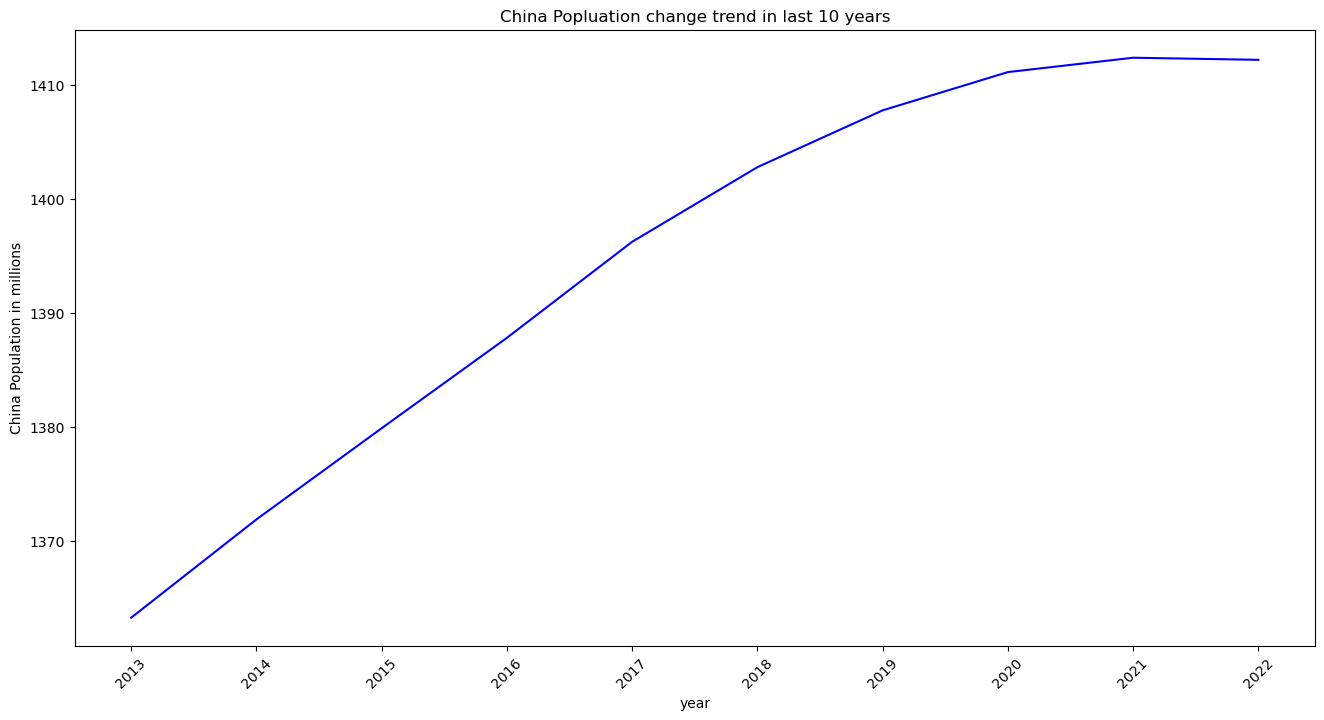

In [41]:
# The trend of poplulation change in last 10 year in China.
df_China = df_countries[df['Country Name']=='China']
year = ['2013','2014','2015','2016','2017','2018','2019','2020','2021','2022']
df_China_10yr = df_China[df.columns & year]

population = []
for i in year:
    population.append(df_China_10yr[i]/1000000)


#plot a line chart
plt.figure(figsize = (16, 8))
plt.plot(year, population, color = "blue")
plt.xticks(rotation = 45)
plt.xlabel("year")
plt.ylabel("China Population in millions")
plt.title("China Popluation change trend in last 10 years")
plt.show()

###### China's population increase started to flat out since year 2020. now I am interested to see how India doing

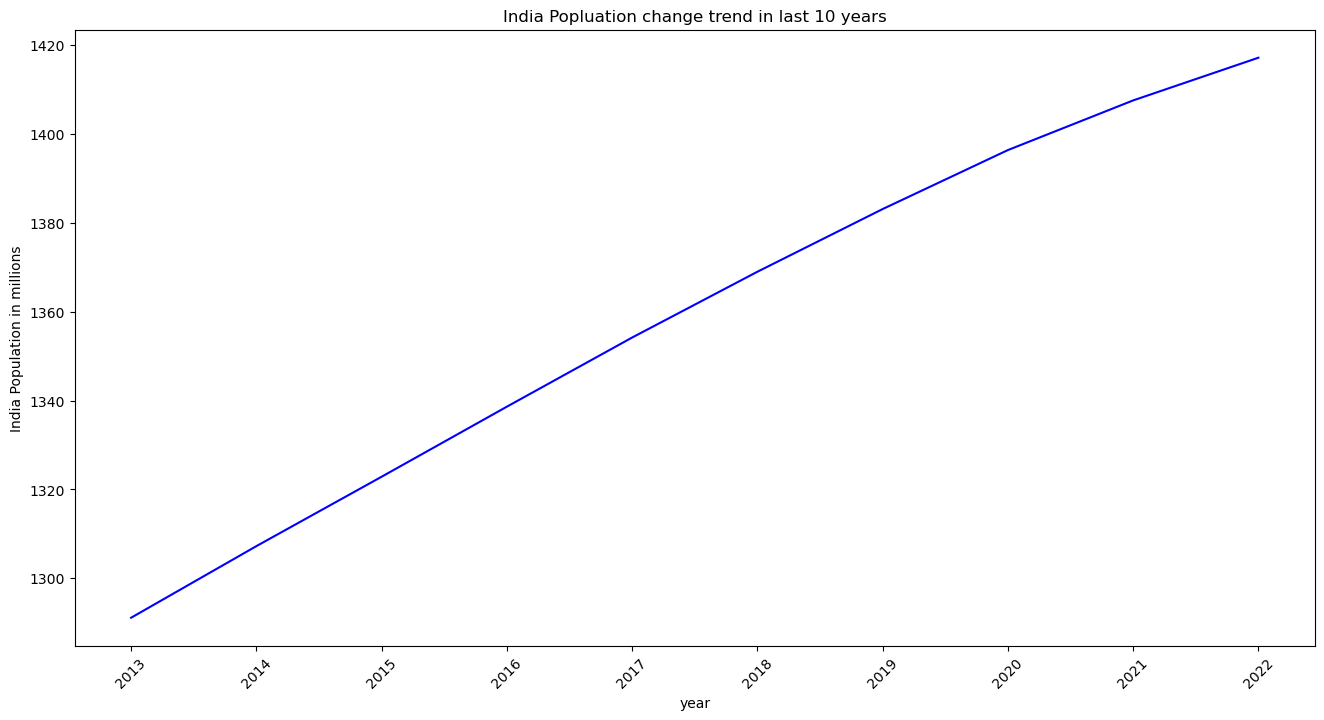

In [44]:
# Check the trend of poplulation change in last 10 year for India.
df_Inida = df_countries[df['Country Name']=='India']
year = ['2013','2014','2015','2016','2017','2018','2019','2020','2021','2022']
df_India_10yr = df_Inida[df.columns & year]

population_India = []
for i in year:
    population_India.append(df_India_10yr[i]/1000000)


#plot a line chart
plt.figure(figsize = (16, 8))
plt.plot(year, population_India, color = "blue")
plt.xticks(rotation = 45)
plt.xlabel("year")
plt.ylabel("India Population in millions")
plt.title("India Popluation change trend in last 10 years")
plt.show()

###### looks like India population is still keep its up trend at almost same rate

##### Conclusion:
The analysis and visualizations above answered my questions in clear way:
1. who are the top 5 countries in term of popoluation in year 2022
   ---> China and India are no surprise. it also shows that India is now the No.1 in term of population. USA tooks the third place. Indonisia and packistan also take a place in top 5.
2. In last 10 years, who are top 5 countries have most population increase.
   ---> The chart names the top 5 out very clearly. the chart also shows that India increasement is more than double of the        increasement from China.
3. The trend of poplulation change in last 10 year in China.
   ---> it is clear that China is lack of power of having more baby since 2020, its rate of increase almost stopped, while India is still a power horse and keep the same rate. no wonder Inida take the crown of most populated country from China.  